In [1]:
# Carga de librerías requeridas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Cargar archivos de datos

data = pd.read_table('db_data.dat', names=['s2','dm','ji'],delim_whitespace=True)
data_cl68 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl68.dat", names=['s2','dm'], delim_whitespace=True)
data_cl95 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl95.dat", names=['s2','dm'], delim_whitespace=True)
data_cl99 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl99.dat", names=['s2','dm'], delim_whitespace=True)

In [3]:
# Obtención del ji minímo de los datos y sus correspondientes parámetros de oscilación

s2_min = data.iloc[data['ji'].idxmin()][0]
dm_min = data.iloc[data['ji'].idxmin()][1]
ji_min = data.iloc[data['ji'].idxmin()][2]
s2_min, dm_min, ji_min

(0.08564177493026434, 0.0025216, 146.41220137812832)

In [4]:
# Restando el ji_min a la columna de ji
data['ji']=data['ji']-ji_min
data['ji'].min()

0.0

In [5]:
# Filtrando datos por nivel de confianza

data_68=data[(data['ji'] <=  2.30) & (data['ji'] >=  2.25)][['s2','dm']]
data_95=data[(data['ji'] <=  6.18) & (data['ji'] >=  6.10)][['s2','dm']]
data_99=data[(data['ji'] <= 11.83) & (data['ji'] >= 11.71)][['s2','dm']]

data_68.to_csv('db_confidence_region_68.csv',sep=' ',index=False, header=False)
data_95.to_csv('db_confidence_region_95.csv',sep=' ',index=False, header=False)
data_99.to_csv('db_confidence_region_99.csv',sep=' ',index=False, header=False) 

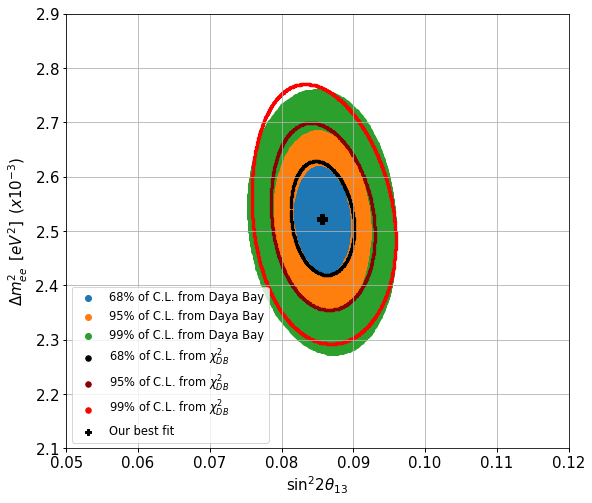

In [58]:
# Graficando datos en regiones de confianza

fig,ax=plt.subplots(figsize=(9, 8))
ax.scatter(data_cl68['s2'].to_numpy(),data_cl68['dm'].to_numpy(),label='68% of C.L. from Daya Bay')
ax.scatter(data_cl95['s2'].to_numpy(),data_cl95['dm'].to_numpy(),label='95% of C.L. from Daya Bay')
ax.scatter(data_cl99['s2'].to_numpy(),data_cl99['dm'].to_numpy(),label='99% of C.L. from Daya Bay')
ax.scatter(  data_68['s2'].to_numpy(),  data_68['dm'].to_numpy(),s=5.0,c='black',  label=r'68% of C.L. from $\chi^2_{DB}$')
ax.scatter(  data_95['s2'].to_numpy(),  data_95['dm'].to_numpy(),s=5.0,c='darkred',label= '95% of C.L. from $\chi^2_{DB}$')
ax.scatter(  data_99['s2'].to_numpy(),  data_99['dm'].to_numpy(),s=5.0,c='red',    label= '99% of C.L. from $\chi^2_{DB}$')
ax.scatter(s2_min,dm_min,c='black',marker='P' ,label='Our best fit',s=100)
# Limites en los ejes
ax.set_xlim(0.05, 0.12)
ax.set_ylim(00.0021, 0.0029)

ax.set_xticks([0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12])
ax.set_yticks([0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029])

ax.set_yticklabels(['$2.1$','$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$','$2.9$'])

# Plot legend.
lgnd=ax.legend()
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=11.5)
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=13, width=1)
ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$')
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=15, width=1)
#fig.savefig("db_confidence_region_DB.eps")
fig.savefig("db_confidence_region_DB.png")
plt.show()

# Perfil ( $\Delta \chi^2$, $\sin^2 2\theta_{13}$)

In [44]:
# Obtención de datos para el perfil
s2_profile=data[data['dm']==dm_min][['s2','ji']]
parabol_s2=pd.read_table("../daya_for_global_analysis/db_data/db_profile_s2.dat", names=['s2','ji'], delim_whitespace=True)

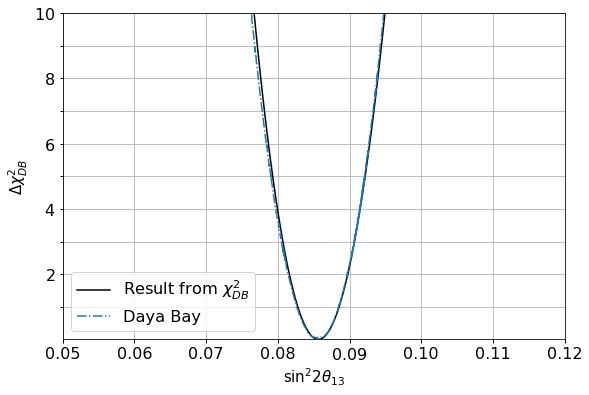

In [54]:
# Gráfica de (  Δ𝜒2 ,  sin22𝜃13 )
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(s2_profile['s2'].to_numpy(),s2_profile['ji'].to_numpy(),c='black',linestyle='-',label=r'Result from $\chi^2_{DB}$')
ax.plot(parabol_s2['s2'].to_numpy(),parabol_s2['ji'].to_numpy(),linestyle='-.',label=r'Daya Bay')

ax.legend()
ax.set_xlim(0.05, 0.12)
ax.set_ylim(0.0, 10)
ax.grid(True, linestyle='-')



ax.set_xticks([0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12])
ax.set_xticklabels(['0.05','0.06','0.07','0.08','$0.09$','0.10','0.11','0.12'])

ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])


lgnd = plt.legend(loc="lower left", fontsize=16.2)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=16, width=1)

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta \chi^2_{DB}$')
#fig.savefig("db_parabol_s22t13_cov.eps")
fig.savefig("db_parabol_s22t13_cov.png")

In [38]:
s2_left=0.08258487703439642
s2_right=0.08852834892948841

s2_sigma_left  = s2_min   - s2_left
s2_sigma_right = s2_right - s2_min

(s2_sigma_left,s2_sigma_right)

(0.0030568978958679244, 0.002886573999224068)

# Perfil( $\Delta \chi^2$, $\Delta m^2_{ee}$)

In [39]:
# Obtención de datos para el perfil
dm_profile=data[data['s2']==s2_min][['dm','ji']]
parabol_dmee=pd.read_table('../daya_for_global_analysis/db_data/db_profile_dm.dat',names=['dm','ji'],delim_whitespace=True)

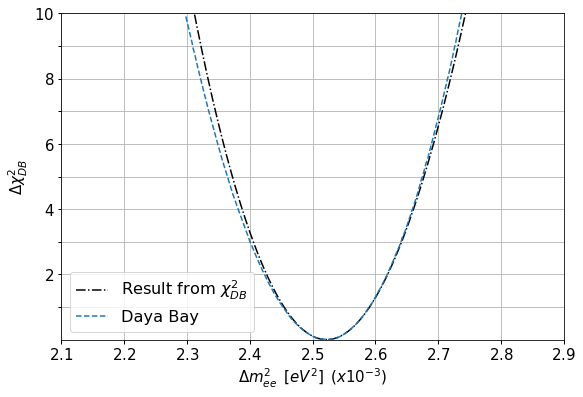

In [49]:
#Gráfica
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(dm_profile['dm'],dm_profile['ji'],c='black',linestyle='-.',label=r'Result from $\chi^2_{DB}$')
ax.plot(parabol_dmee['dm'].to_numpy(),parabol_dmee['ji'].to_numpy(),linestyle='--',label=r'Daya Bay')

ax.legend()
ax.set_xlim(0.0021, 0.0029)
ax.set_ylim(0.0, 10)
ax.grid(True, linestyle='-')

ax.set_xticks([0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['$2.1$','$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$','$2.9$'])
ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])

lgnd = plt.legend(loc="lower left", fontsize=16.2)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=15, width=1)

ax.set(xlabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$', ylabel=r'$\Delta \chi^2_{DB} $')
#fig.savefig("db_parabol_dmee_cov.eps")
fig.savefig("db_parabol_dmee_cov.png")

In [12]:
dm_left =0.002452889286535587
dm_right=0.002591175836495346

dm_sigma_left=dm_min-dm_left
dm_sigma_right=dm_right-dm_min

(dm_sigma_left,dm_sigma_right)

(6.871071346441302e-05, 6.957583649534575e-05)